> ## GeoSpatial Analysis With Python

## Background
-  **1) What is GeoSpatial Data?**
    - The geospatial is used to indicate that data that has a geographic component to it. This means that the records in a dataset have locational information tied to them such as geograppic data in the form of coordinates, address, city, or ZIP code. GIS data is a form of geospatial data.Other geospatial data can originate form GPS data, satellite imagery, and geotagging.

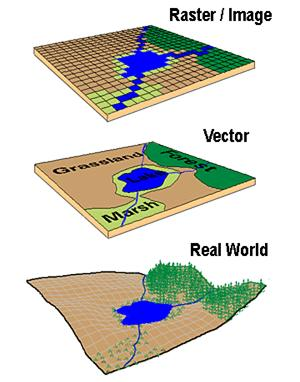

In [1]:
from IPython.display import Image
Image("Images/geospatial.jpg")

- **2) Types of GeoSpatial Data**
    - Vector/Polygon Data
        - A representation of the world using points, lines, and polygons.
        - Vector models are useful for storing data that has discrete boundaries, such as country borders, land parcels, and streels.
        - Common formats are Shape Files, GeoJSON, KML(Keyhole Markup Language)
        - Often used by data scientists to calculate additional variabes(distance to water in this example) or weight attributes based on area/density.

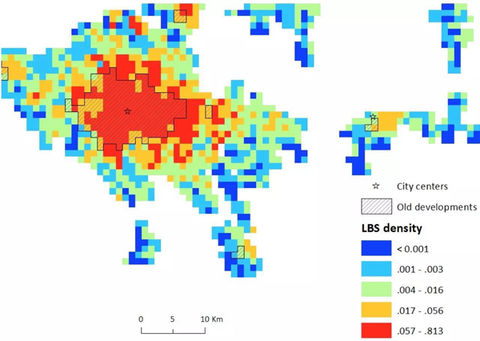

In [2]:
Image("Images/density.jpg")

   - Raster Data
       - Rasters are digital aerial photographs,imagery from satellites, digital pictures, or even scanned maps
       - Common formats are .JPG, .TIF, .GIF or similar format
       - Can help answer fuzzy questions like "how many fields were planted in county X vs left fallow?"
       - This ends up being an image recognition type problem as you are trying to planted vs fallow by coloration.

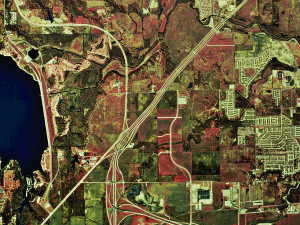

In [3]:
Image("Images/raster.jpg")

   - Tablular Files
       - Numeric data is statistical data which includes a gepgraphical component
       - Joined with vector files so the data can be queried and dis played as a layer on a map in a GIS.
       - The most common type of numeric data is demographic data from the US Census.
       - Unique Identifiers(Hydrology Number, State, Metropolitan Statistical Area ID, Lat/Long, etc)
       - Typically what most data scientists & statisticians work with , columns of attributes/characteristics that describe an customer/town/entity.

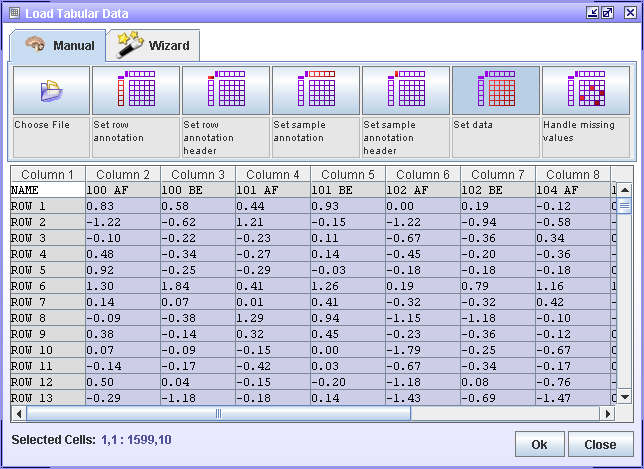

In [4]:
Image("Images/tablular.png")

- **3) What kinds of GeoSptial Data is available?**

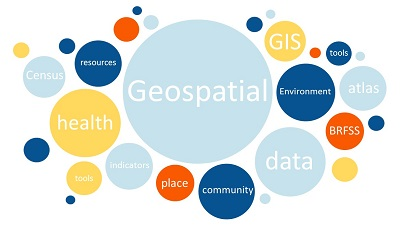

In [5]:
Image("Images/geospatialdata.jpg")

   - Government
       - Local (MetCouncil, Minneapolis School District)
       - State(DMR,MN, PCA, Hennepin County)
       - Federal(Census Bureau, NASA)
   - Private
       - Energy(Ecel Engery, Centerpoint, etc)
       - Technology(Google, Uber,etc)

- **4) Where can I get Minnesota GeoSpatial Data?**
    - Go to https://gisdata.mn.gov/dataset you will find some great Minnesota GeoSpatial Data files.

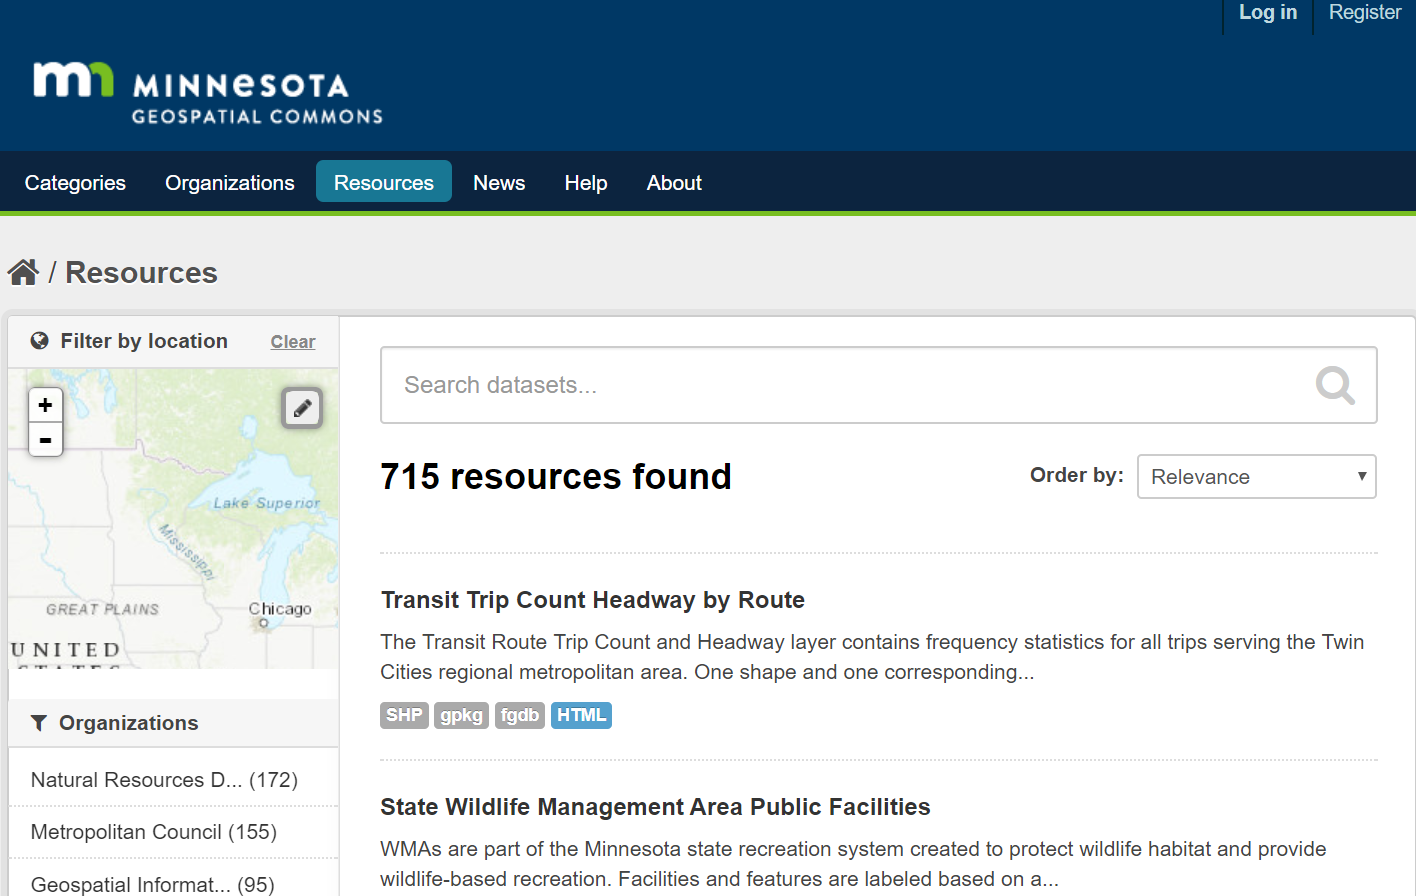

In [6]:
Image("Images/mdata.png")

## Technical
- Getting Set Up and Warm Up
    - Get start with Anaconda 3.6
    (You can download it from https://www.anaconda.com/download/)
    - Install Additional Libraries
    - Use Conda Forge: a github organization containing repositories of conda recipes.

Enable conda-forge repositories by running the cell below.

In [7]:
! conda config -- add channels conda-forge

usage: conda config [-h] [--json] [--debug] [--verbose]
                    [--system | --env | --file FILE]
                    (--show | --show-sources | --validate | --describe | --get [KEY [KEY ...]] | --append KEY VALUE | --prepend KEY VALUE | --set KEY VALUE | --remove KEY VALUE | --remove-key KEY)
conda config: error: one of the arguments --show --show-sources --validate --describe --get --append --prepend/--add --set --remove --remove-key is required


**Some Python Geospatial Libraries**
- 1) Geopandas:http://geopandas.org/
- 2) shapely:https://pypi.python.org/pypi/Shapely
- 3) rtree:https://pypi.python.org/pypi/Rtree/
- 4) pyshp:https://pypi.python.org/pypi/pyshp
- 5) pyproj:https://pypi.python.org/pypi/pyproj?
- 6) flona:https://pypi.python.org/pypi/Fiona
- 7) geopy:https://pypi.python.org/pypi/geopy
- 8) pysal:http://pysal.readthedocs.io/en/latest/

Install the packages by using the cell below

In [39]:
!conda install -y geopandas
!conda install -y rtree
!conda install -y pyshp
!conda install -y pyproj
!conda install -y geopy

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Stephanie Z\Anaconda2\envs\tf:
#
geopandas                 0.3.0                    py36_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Stephanie Z\Anaconda2\envs\tf:
#
rtree                     0.8.3                    py36_0    conda-forge
Fetching package metadata .............



PackageNotFoundError: Packages missing in current channels:
            
  - pyshp

We have searched for the packages in the following channels:
            
  - https://repo.continuum.io/pkgs/main/win-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/win-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/win-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/win-64
  - https://repo.continuum.io/pkgs/pro/noarch
  - https://repo.continuum.io/pkgs/msys2/win-64
  - https://repo.continuum.io/pkgs/msys2/noarch
            



Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at C:\Users\Stephanie Z\Anaconda2\envs\tf:
#
pyproj                    1.9.5.1                  py36_0  
Fetching package metadata .............



PackageNotFoundError: Packages missing in current channels:
            
  - geopy

We have searched for the packages in the following channels:
            
  - https://repo.continuum.io/pkgs/main/win-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/win-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/win-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/win-64
  - https://repo.continuum.io/pkgs/pro/noarch
  - https://repo.continuum.io/pkgs/msys2/win-64
  - https://repo.continuum.io/pkgs/msys2/noarch
            



Then you might need to install Additional Github packages
- 1) pandas-summary:https://pypi.python.org/pypi/pandas-summary/0.0.41
- 2) geoplotlib:https://pypi.python.org/pypi/geoplotlib
- 3) missingno:https://pypi.python.org/pypi/missingno/

# Data Set
**MetroGIS Tax Parcels**

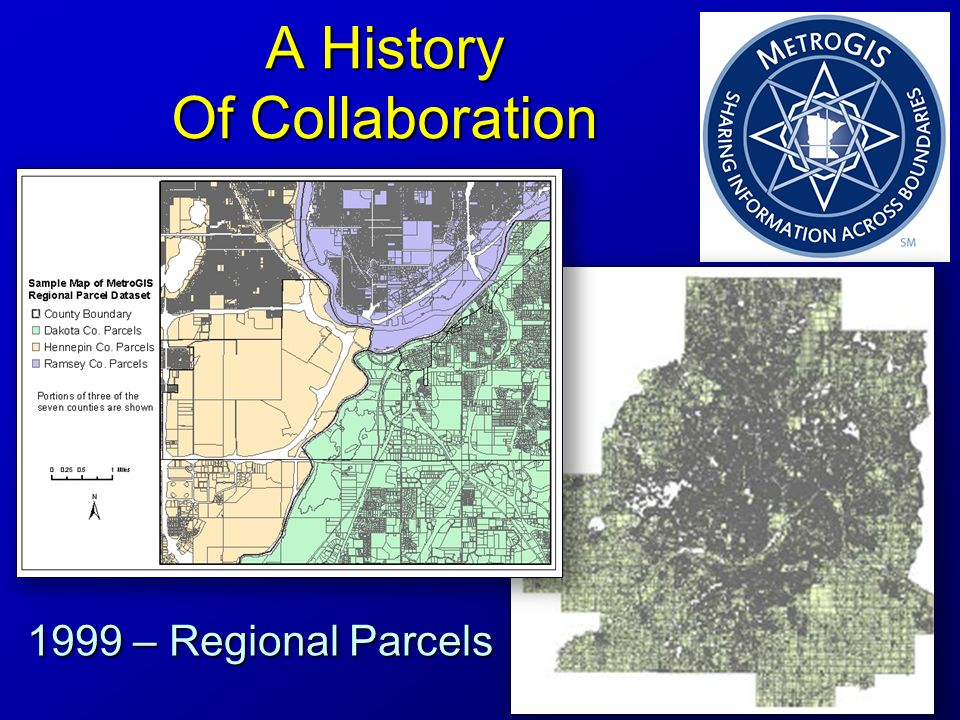

In [9]:
Image("Images/MetroGIS.jpg")

**Extract Data**

In [10]:
from zipfile import ZipFile

list_file=['./Data/data.zip']

for archive in list_file:
    zfile=ZipFile(archive)
    zfile.extractall('./Data/')

**Reading in Data**
- The geopandas library can read almost any vector-based spatial data format.

Use the cell below to import the shapefile data into a GeoDataFrame.

In [102]:
import geopandas as gpd

shp_file='./Data/MetroGIS_Tax_Parcels_2014/Parcels2014Hennepin.dbf'

dataset=gpd.read_file(shp_file)

Next, import libraries for data analysis
Here is a way to plot inside the notebook.

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Here change the width of the cell
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:100% !important; }</style>"))

#Here use to display all columns
pd.options.display.max_columns=None

#Here is the scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Here is the size of plot
plt.rcParams['figure.figsize']=10,10

In [13]:
#Have a look at the dataset
dataset.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 427762 entries, 0 to 427761
Data columns (total 70 columns):
Shape_Leng    427762 non-null float64
COUNTY_ID     427762 non-null object
PIN           427762 non-null object
BLDG_NUM      427762 non-null object
PREFIX_DIR    0 non-null object
PREFIXTYPE    0 non-null object
STREETNAME    427762 non-null object
STREETTYPE    0 non-null object
SUFFIX_DIR    0 non-null object
UNIT_INFO     51470 non-null object
CITY          427762 non-null object
CITY_USPS     414475 non-null object
ZIP           427762 non-null object
ZIP4          0 non-null object
PLAT_NAME     426333 non-null object
BLOCK         305269 non-null object
LOT           290705 non-null object
ACRES_POLY    427762 non-null float64
ACRES_DEED    427762 non-null float64
USE1_DESC     426337 non-null object
USE2_DESC     4398 non-null object
USE3_DESC     752 non-null object
USE4_DESC     207 non-null object
MULTI_USES    0 non-null object
LANDMARK      0 non-null obje

**Exploring Data**

Next, we will create an index to traverse the data faster. Before that, we need to make sure that all of the PIN values are unique and count NULL values in the list.

In [14]:
dataset['PIN'].nunique(dropna=True)/ len(dataset['PIN'])

1.0

After that, we will set the index

In [15]:
dataset=dataset.set_index(['PIN']).sort_index()

Next, we will inspect the unique values in the column

In [16]:
list(dataset['GREEN_ACRE'].unique())

['N', 'Y']

Now, we will find out how many object columns there are.

In [17]:
column_list= list(dataset.select_dtypes(include=['object']).columns.values)
len(column_list)

54

Here we would like to create a function that looks for columns that number of unique values is less than 20% of total row count.
We can convert a column to category type if it has low cardinality.

In [18]:
def convert_to_categorical(df,cols):
    for col in cols:
        unique_vals=len(df[col].unique())
        unique_ratio=unique_vals/len(df)
        if unique_ratio <=0.2:
            df[col]=df[col].astype('category')
    return df

In [19]:
column_list=list(dataset.select_dtypes(include=['object']).columns.values)
column_list.remove('geometry')
dataset=convert_to_categorical(dataset,column_list)

Here we can see the usage of our memory.

In [20]:
dataset.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 427762 entries, 053-0102724110003 to 053-3612123410019
Columns: 69 entries, Shape_Leng to geometry
dtypes: category(50), float64(13), int64(2), object(4)
memory usage: 96.1+ MB


**Profiling**

Now, we will summary stats of our data.

In [42]:
from pandas_summary import DataFrameSummary

dataset_stats=DataFrameSummary(dataset.drop('geometry',axis=1))

mean                                                               100417.396
std                                                                369414.051
variance                                                     136466741168.371
min                                                                     0.000
max                                                              96791600.000
5%                                                                      0.000
25%                                                                 25300.000
50%                                                                 50200.000
75%                                                                100000.000
95%                                                                267600.000
iqr                                                                 74700.000
kurtosis                                                            13820.561
skewness                                                        

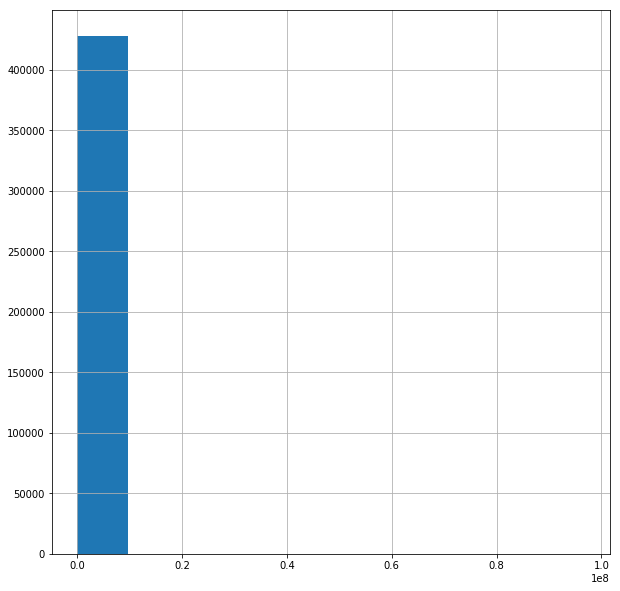

In [43]:
dataset_stats['EMV_LAND']

We can see some constant columns. We need to go ahead remove them.

In [46]:
dataset_stats.columns_stats

,Shape_Leng,BLDG_NUM,STREETNAME,UNIT_INFO,CITY,CITY_USPS,ZIP,PLAT_NAME,BLOCK,LOT,ACRES_POLY,ACRES_DEED,USE1_DESC,USE2_DESC,OWNER_NAME,TAX_NAME,TAX_ADD_L1,TAX_ADD_L2,TAX_ADD_L3,HOMESTEAD,EMV_LAND,EMV_BLDG,EMV_TOTAL,TAX_CAPAC,TOTAL_TAX,SPEC_ASSES,TAX_EXEMPT,XUSE1_DESC,HOME_STYLE,FIN_SQ_FT,GARAGE,GARAGESQFT,BASEMENT,HEATING,COOLING,YEAR_BUILT,SALE_DATE,SALE_VALUE,SCHOOL_DST,WSHD_DIST,GREEN_ACRE,OPEN_SPACE,AG_PRESERV,TORRENS,Shape_Le_1,Shape_Area
counts,427762,427762,427762,51470,427762,414475,427762,426333,305269,290705,427762,427762,426337,4398,426336,426337,426189,426071,62165,426337,427762,427762,427762,427762,427762,427762,427762,17641,152400,427762,157514,157514,111420,156532,157514,427762,331140,427762,426337,350447,427762,427762,427762,427762,427762,427762
uniques,364728,21678,7387,6849,47,48,78,18487,217,391,3556,1,45,34,359131,357605,356554,54603,3192,2,9151,12417,14890,16850,27282,4282,2,38,15,4666,2,1443,2,6,4,163,552,40903,23,8,2,2,2,3,364358,365041
missing,0,0,0,376292,0,13287,0,1429,122493,137057,0,0,1425,423364,1426,1425,1573,1691,365597,1425,0,0,0,0,0,0,0,410121,275362,0,270248,270248,316342,271230,270248,0,96622,0,1425,77315,0,0,0,0,0,0
missing_perc,0%,0%,0%,87.97%,0%,3.11%,0%,0.33%,28.64%,32.04%,0%,0%,0.33%,98.97%,0.33%,0.33%,0.37%,0.40%,85.47%,0.33%,0%,0%,0%,0%,0%,0%,0%,95.88%,64.37%,0%,63.18%,63.18%,73.95%,63.41%,63.18%,0%,22.59%,0%,0.33%,18.07%,0%,0%,0%,0%,0%,0%
types,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numeric,constant,categorical,categorical,categorical,categorical,categorical,categorical,categorical,bool,numeric,numeric,numeric,numeric,numeric,numeric,bool,categorical,categorical,numeric,bool,categorical,bool,categorical,categorical,numeric,categorical,numeric,categorical,categorical,bool,bool,bool,categorical,numeric,numeric


In [103]:
drop_cols=['AGPRE_ENRD','AGPRE_EXPD','COUNTY_ID','DWELL_TYPE','LANDMARK',
           'MULTI_USES','NUM_UNITS','OWNER_MORE','OWN_ADD_L1','OWN_ADD_L2',
          'OWN_ADD_L3','PARC_CODE','PREFIXTYPE','PREFIX_DIR','STREETTYPE',
           'SUFFIX_DIR','ZIP4']
dataset=dataset.drop(drop_cols,axis=1)

**Missing data**

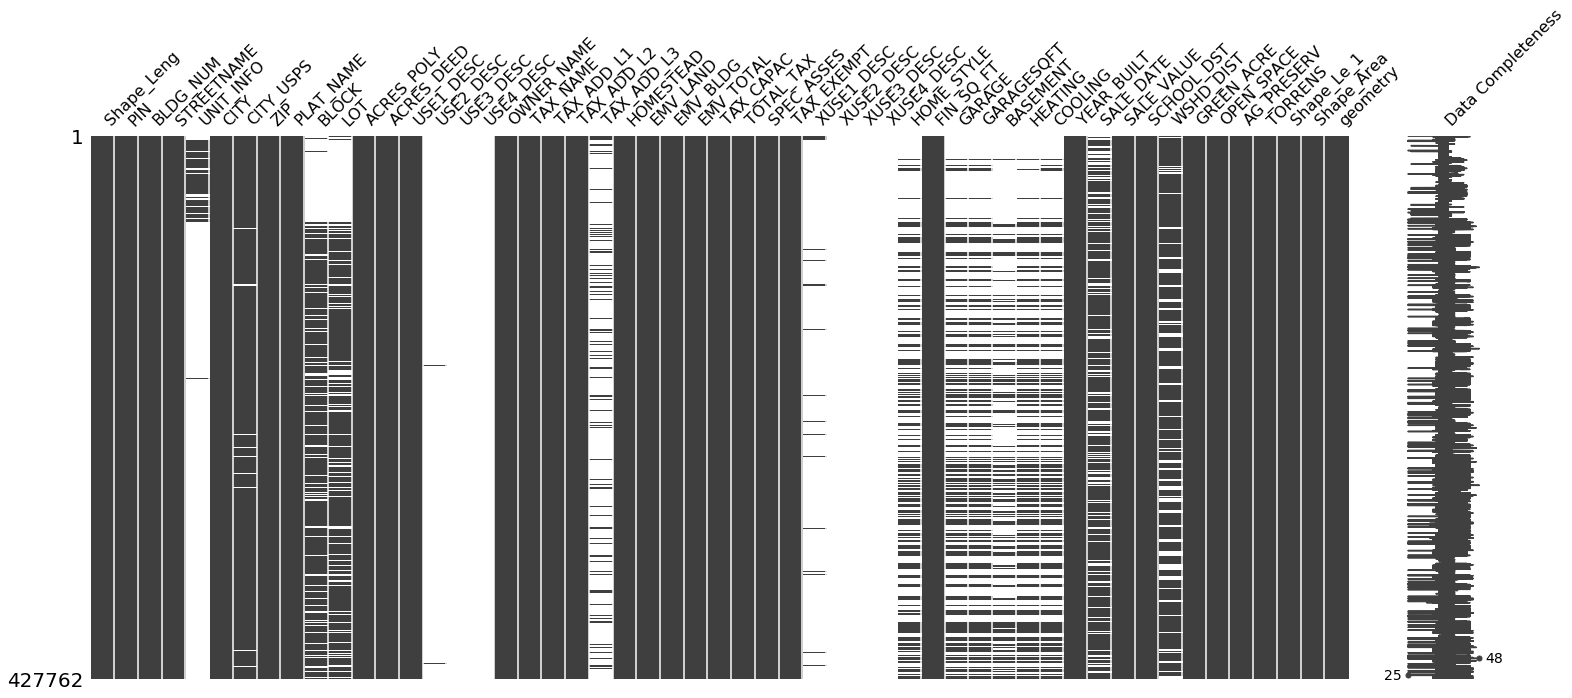

In [104]:
import missingno as msno
msno.matrix(dataset,labels=True)

We can see some columns are scarcely populated, so we decide to remove them. If they are less than 1% populated.

In [50]:
def delete_near_null(df,cols,populated_threshold=0.01):
    for col in cols:
        non_null_rows=df[col].count()
        total_rows=len(df[col])
        populated_ratio =non_null_rows/total_rows
        if populated_ratio <= populated_threshold:
            del df[col]
    return df

In [105]:
#Check if get the full list of columns
column_list=list(dataset.columns.values)
column_list.remove('geometry')
dataset=delete_near_null(dataset,column_list)

We can see what our dataset looks like now.

In [107]:
dataset.shape

(427762, 48)

**Filtering on Geodesic Features**
- The dataset have point information.They are helping break up condos into individually owned units and tax each seperately.

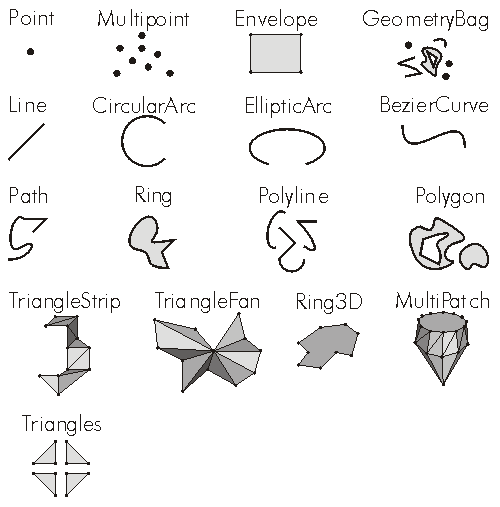

In [53]:
Image("Images/GeomGeometryTypes.jpg")

In [108]:
#filter points
dataset=dataset[dataset['geometry'].geom_type!='Point']

Geospatial Joins and Searchs are computationally expensive. So if we need to do each city at a time, we ould write a loop to do it.

In [109]:
mpls=dataset[dataset['CITY']== 'MINNEAPOLIS']

In [110]:
mpls.shape

(129889, 48)

We have 25% of the data we started with , that makes things speed up.

**Joins and Merges**

First, we need to read in shape file.

In [68]:
shape_file='./Data/MetCouncil_Lakes_Rivers/LakesAndRivers.dbf'
water_df=gpd.read_file(shape_file).set_index(['OWF_ID']).sort_index()

In [69]:
water_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2349 entries, 00640874 to 99002540
Data columns (total 7 columns):
SYSTEM        2349 non-null object
NAME_DNR      1588 non-null object
ALT_NAME      210 non-null object
AREA_ACRES    2349 non-null float64
Shape_Leng    2349 non-null float64
Shape_Area    2349 non-null float64
geometry      2349 non-null object
dtypes: float64(3), object(4)
memory usage: 146.8+ KB


Now, plot it.

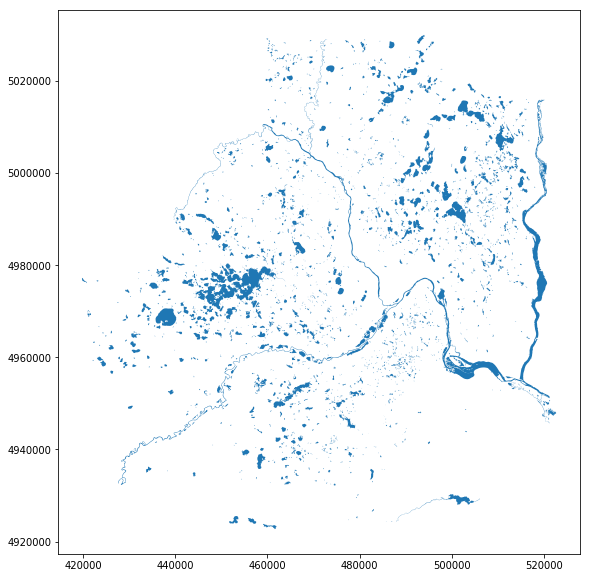

In [70]:
water_df.plot()
plt.show()

We can see all the water features in this area.

And here we can take a look at the fill rate of data.

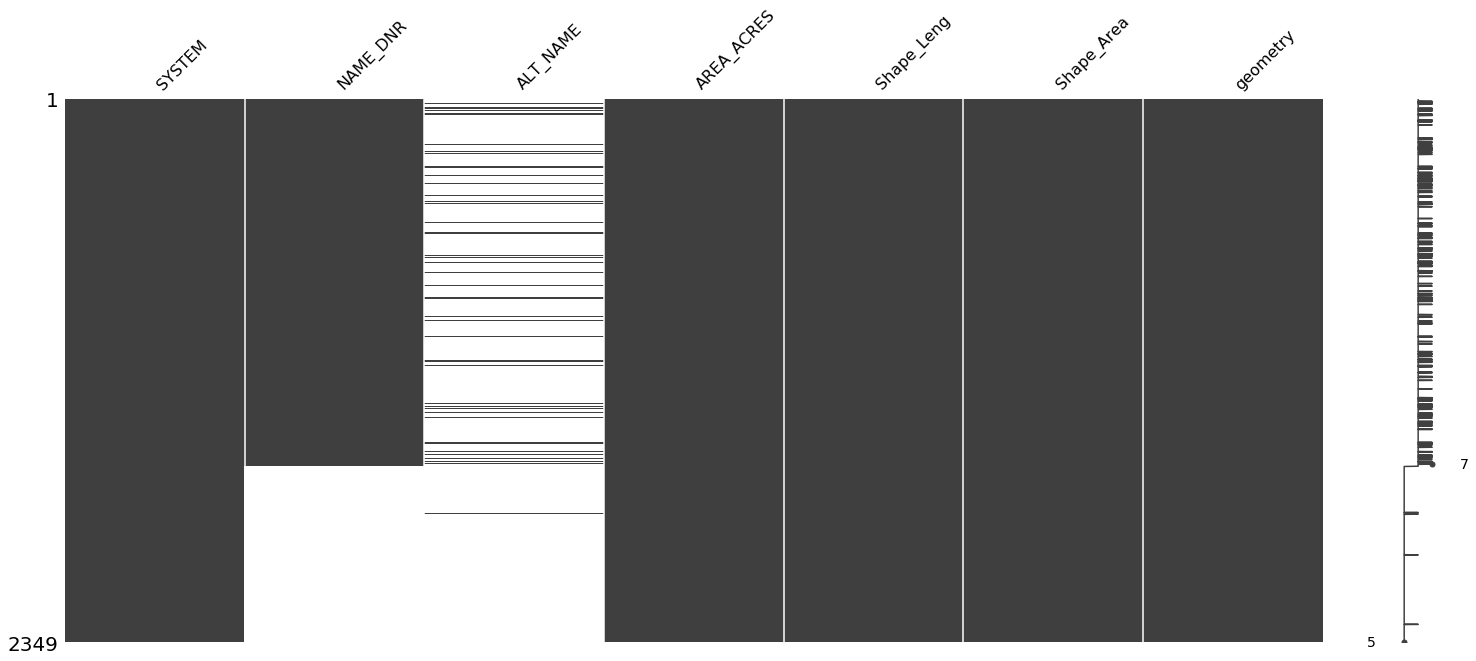

In [71]:
msno.matrix(water_df)

It seems like a lot of water features don't have names.

**Geospatial Transformations**

Filter the data down to any lakes that are named 'Cedar'

In [140]:
cedar_lake=water_df[water_df['NAME_DNR']=='Cedar']
cedar_lake

,SYSTEM,NAME_DNR,ALT_NAME,AREA_ACRES,Shape_Leng,Shape_Area,geometry
OWF_ID,,,,,,,
27003900,Lake,Cedar,None,168.410,4803.871,681542.105,"POLYGON ((474663.9454 4979190.5593, 474684.879..."
70009100,Lake,Cedar,None,793.480,11307.426,3211136.072,"POLYGON ((458834.4773 4938960.6654, 458842.693..."


Find out that there are two lakes named Cedar.So we need to take a look at the given lake's shape to see.

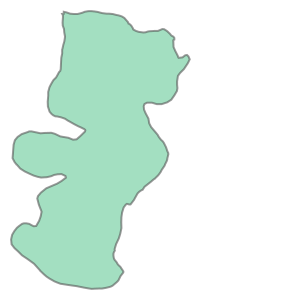

In [141]:
cedar_lake['geometry'].iloc[0]

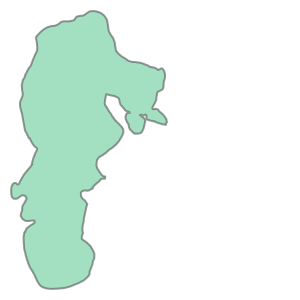

In [142]:
cedar_lake['geometry'].iloc[1]

Now, filter to use the first lake. It is what we want.

In [143]:
cedar_lake=cedar_lake.iloc[[0]]

In [144]:
cedar_lake

,SYSTEM,NAME_DNR,ALT_NAME,AREA_ACRES,Shape_Leng,Shape_Area,geometry
OWF_ID,,,,,,,
27003900,Lake,Cedar,None,168.410,4803.871,681542.105,"POLYGON ((474663.9454 4979190.5593, 474684.879..."


We can accomplish this by 'buffering' or making the shape bigger in all directions. Here we select to do 100m for good measure.

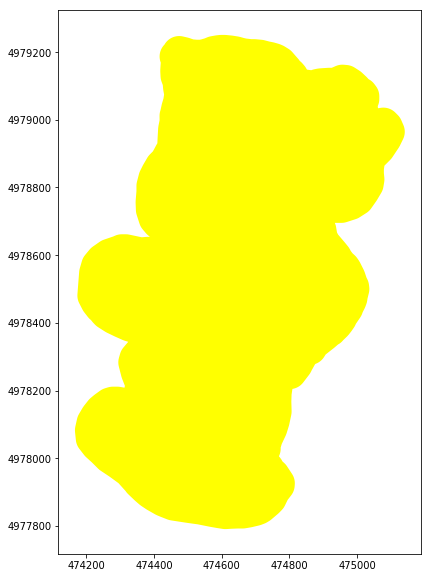

In [146]:
buffered_cedar_lake=cedar_lake.buffer(50)
ax=cedar_lake.plot(color='blue')
buffered_cedar_lake.plot(ax=ax,color='yellow')
plt.show()

Now,we want to only get its shape, so go ahead get the polygon to see where their are overlaps with properties.

In [147]:
buffered_cedar_poly=buffered_cedar_lake.iloc[0]

After the step above, we will set the spatial index of the geospatial dataset that we would like to search.

In [148]:
spatial_index=mpls.sindex

Now, we will use a bounding Box to makes a rectangle enclose to our polygon.

In [149]:
cedar_bb=buffered_cedar_poly.bounds
cedar_bb

(474166.79343057435, 4977790.681896646, 475141.18519080535, 4979250.6081)

Here is how to use the bounding box that rectangle buffered lake fits in.

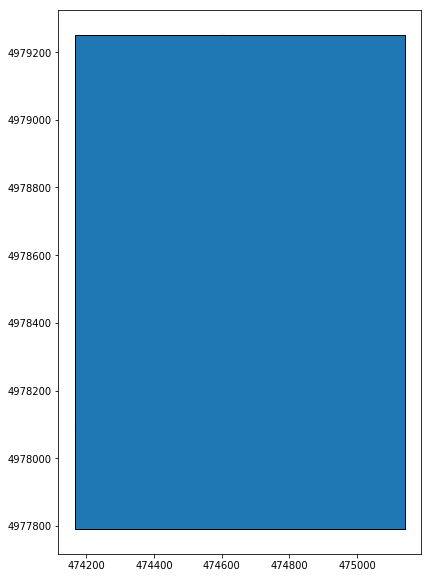

In [150]:
from shapely.geometry import box
from descartes import PolygonPatch

cedar_box=box(cedar_bb[0],cedar_bb[1],cedar_bb[2],cedar_bb[3])#convert it into polygon

fig=plt.figure()#plot rectangle
ax=fig.gca()
ax.add_patch(PolygonPatch(cedar_box))

ax.axis('scaled')#ensure whether distorting the image

buffered_cedar_lake.plot(ax=ax)
plt.show()

Reference:
- https://www.youtube.com/watch?v=qvHXRuGPHl0
- https://www.google.com/search?q=geospatial+data+image&tbm=isch&source=iu&pf=m&ictx=1&fir=LGO4NXKCl-dwMM%253A%252CiMeQ8opyKZa60M%252C_&usg=__1MBMM6WjwOMtzOCd-hEJh8TFOhc%3D&sa=X&ved=0ahUKEwjTpZCR_pnXAhVU2WMKHV_mD2UQ9QEIKTAA#imgrc=LGO4NXKCl-dwMM:
- http://image.baidu.com/search/detail?ct=503316480&z=0&ipn=d&word=%E5%9C%B0%E7%90%86%E5%8C%BA%E5%9F%9F%E5%AF%86%E5%BA%A6%E5%9B%BE&step_word=&hs=0&pn=6&spn=0&di=79070297240&pi=0&rn=1&tn=baiduimagedetail&is=0%2C0&istype=0&ie=utf-8&oe=utf-8&in=&cl=2&lm=-1&st=undefined&cs=1941905367%2C63558609&os=2519725589%2C1979247719&simid=3441016545%2C362978436&adpicid=0&lpn=0&ln=1931&fr=&fmq=1509424212646_R&fm=&ic=undefined&s=undefined&se=&sme=&tab=0&width=undefined&height=undefined&face=undefined&ist=&jit=&cg=&bdtype=0&oriquery=&objurl=http%3A%2F%2Fimgres.roboo.com%2Fgroup4%2FM01%2F3E%2F3B%2FwKhkDViU1pCAOGqjAACRjVBbJCQ688.jpg&fromurl=ippr_z2C%24qAzdH3FAzdH3Fg_z%26e3B65k55_z%26e3Bv54AzdH3FgjofAzdH3F1jpwts_z%26e3Bip4%3Ft1%3Dk8a1bnnjulcd1bw1uknv9m8v8udlmjbl%26tg1jx%3Dggjof&gsm=0&rpstart=0&rpnum=0
- https://www.cdc.gov/gis/geo-spatial-data.html
- https://www.google.com/search?q=sample+map+of+metroGIS+Regional+Parcel+Datasets&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjCwe-445zXAhVBT2MKHXceCZQQ_AUICigB&biw=718&bih=582#imgrc=ys_bmYXZpEAxzM:
- https://www.google.com/imgres?imgurl=http%3A%2F%2Fresources.esri.com%2Fhelp%2F9.3%2Farcgisengine%2Farcobjects%2FesriGeometry%2Fbitmaps%2FGeomGeometryTypes.gif&imgrefurl=http%3A%2F%2Fresources.esri.com%2Fhelp%2F9.3%2Farcgisengine%2Farcobjects%2FesriGeometry%2FesriGeometryType.htm&docid=bSIDyUBjl_u4cM&tbnid=lSmROT9edRVPWM%3A&vet=10ahUKEwjt--HZqJ_XAhVF1GMKHbtjCs4QMwgsKAMwAw..i&w=500&h=507&bih=567&biw=789&q=geom_types%20image&ved=0ahUKEwjt--HZqJ_XAhVF1GMKHbtjCs4QMwgsKAMwAw&iact=mrc&uact=8